In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Cars data analysis

[Here](https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?select=train-data.csv) you can get familiar with the data and the columns meaning.

In [2]:
# Data source: https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?select=train-data.csv
df = pd.read_csv("cars_train.csv", index_col=0)

In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


### First, I'll perform a train-test split.

In [5]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### New_Price
Since there isn't much data with New_Price given, it's best to just remove this column.

In [6]:
X_train.drop('New_Price', axis=1, inplace=True)

### Name
From the Name column, I'll retrieve information about the car brand and model, and choose the brands and models that are most common.

In [7]:
X_train.value_counts('Name')[:20]

Name
Mahindra XUV500 W8 2WD              35
Maruti Swift VDI                    31
Maruti Ritz VDi                     26
Hyundai i10 Sportz                  25
Maruti Swift Dzire VDI              24
Honda City 1.5 S MT                 22
Maruti Swift VDI BSIV               22
Toyota Fortuner 3.0 Diesel          20
Hyundai Grand i10 Sportz            19
Honda Brio S MT                     19
Maruti Wagon R LXI                  18
Honda Amaze S i-Dtech               18
Maruti Alto 800 LXI                 17
Hyundai EON Era Plus                17
Renault KWID RXT                    17
Maruti Ertiga VDI                   16
Volkswagen Polo 1.5 TDI Highline    16
Toyota Fortuner 4x2 AT              16
Maruti Alto LXi                     16
Hyundai Verna 1.6 SX                16
dtype: int64

In [8]:
def get_car_brand(car_name):
    return car_name.split()[0]

def get_car_brand_model(car_name):
    return ' '.join(car_name.split()[:2])

In [9]:
X_train['Brand'] = X_train['Name'].apply(get_car_brand)
X_train['Brand_Model'] = X_train['Name'].apply(get_car_brand_model)
X_train.drop('Name', axis=1, inplace=True)

In [10]:
X_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Brand_Model
4201,Jaipur,2011,77000,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,Volkswagen,Volkswagen Polo
4383,Hyderabad,2016,19947,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,Hyundai,Hyundai i10
1779,Kochi,2014,70963,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,Mahindra,Mahindra XUV500
4020,Kolkata,2013,115195,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,Maruti,Maruti Swift
3248,Kochi,2011,58752,Petrol,Manual,First,16.47 kmpl,1198 CC,73.9 bhp,5.0,Volkswagen,Volkswagen Polo


In [11]:
X_train['Brand'].nunique()

28

In [12]:
X_train['Brand_Model'].nunique()

206

In [13]:
brands_counts = X_train['Brand'].value_counts()
common_brands = list(brands_counts[brands_counts >= 20].index)
common_brands # brands that appear at least 20 times

['Maruti',
 'Hyundai',
 'Honda',
 'Toyota',
 'Volkswagen',
 'Mercedes-Benz',
 'Ford',
 'Mahindra',
 'BMW',
 'Audi',
 'Tata',
 'Skoda',
 'Renault',
 'Chevrolet',
 'Nissan',
 'Land',
 'Jaguar']

In [14]:
X_train['Brand'] = X_train['Brand'].where(X_train['Brand'].isin(common_brands), None) # getting rid of uncommon brands

In [15]:
brand_models_counts = X_train['Brand_Model'].value_counts()
common_brand_models = list(brand_models_counts[brand_models_counts >= 10].index)
common_brand_models # models that appear at least 10 times

['Maruti Swift',
 'Honda City',
 'Hyundai i20',
 'Toyota Innova',
 'Hyundai Grand',
 'Hyundai Verna',
 'Hyundai i10',
 'Maruti Wagon',
 'Volkswagen Polo',
 'Maruti Alto',
 'Toyota Fortuner',
 'Mahindra XUV500',
 'Ford Figo',
 'Honda Amaze',
 'BMW 3',
 'Mercedes-Benz E-Class',
 'Volkswagen Vento',
 'Mercedes-Benz New',
 'Hyundai Creta',
 'Audi A4',
 'Maruti Ritz',
 'Renault Duster',
 'Toyota Corolla',
 'BMW 5',
 'Maruti Ciaz',
 'Hyundai Santro',
 'Mahindra Scorpio',
 'Hyundai EON',
 'Maruti Ertiga',
 'Maruti Baleno',
 'Honda Brio',
 'Maruti Celerio',
 'Honda Jazz',
 'Hyundai Xcent',
 'Land Rover',
 'Ford Ecosport',
 'Toyota Etios',
 'Skoda Rapid',
 'Ford EcoSport',
 'Skoda Superb',
 'Maruti Vitara',
 'Audi A6',
 'Chevrolet Beat',
 'Tata Indica',
 'Renault KWID',
 'Ford Endeavour',
 'Ford Fiesta',
 'Audi Q7',
 'Skoda Octavia',
 'Jaguar XF',
 'Maruti SX4',
 'BMW X1',
 'Nissan Sunny',
 'Audi Q3',
 'Honda CR-V',
 'Tata Nano',
 'Honda Civic',
 'Nissan Terrano',
 'Volkswagen Jetta',
 'Audi Q5

In [16]:
X_train['Brand_Model'] = X_train['Brand_Model'].where(
    (X_train['Brand_Model'].isin(common_brand_models)) & (X_train['Brand'].isin(common_brands)), 
    None) # getting rid of uncommon models

In [17]:
X_train[X_train['Brand_Model'].isna()].head() # cars with uncommon models

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Brand_Model
1096,Chennai,2012,97000,Diesel,Manual,First,20.0 kmpl,1497 CC,115 bhp,5.0,Mahindra,None
3905,Delhi,2014,67000,Petrol,Automatic,First,19.16 kmpl,2494 CC,158.2 bhp,5.0,Toyota,None
4151,Chennai,2014,45000,Diesel,Manual,First,18.2 kmpl,1248 CC,73.74 bhp,8.0,Chevrolet,None
4527,Chennai,2016,29000,Diesel,Automatic,First,11.57 kmpl,2987 CC,254.79 bhp,5.0,Mercedes-Benz,None
3939,Mumbai,2006,30000,Petrol,Manual,First,13.0 kmpl,2987 CC,210 bhp,5.0,Mercedes-Benz,None


In [18]:
X_train[['Brand', 'Brand_Model']].value_counts()

Brand       Brand_Model       
Maruti      Maruti Swift          241
Honda       Honda City            185
Hyundai     Hyundai i20           175
Toyota      Toyota Innova         119
Hyundai     Hyundai Grand         116
                                 ... 
            Hyundai Santa          10
            Hyundai Elite          10
Ford        Ford Ikon              10
Volkswagen  Volkswagen Ameo        10
Mahindra    Mahindra Ssangyong     10
Length: 86, dtype: int64

### Owner_Type

In [19]:
owner_counts = X_train['Owner_Type'].value_counts()
owner_counts

First             3453
Second             672
Third               83
Fourth & Above       5
Name: Owner_Type, dtype: int64

<AxesSubplot: xlabel='Owner_Type', ylabel='Price'>

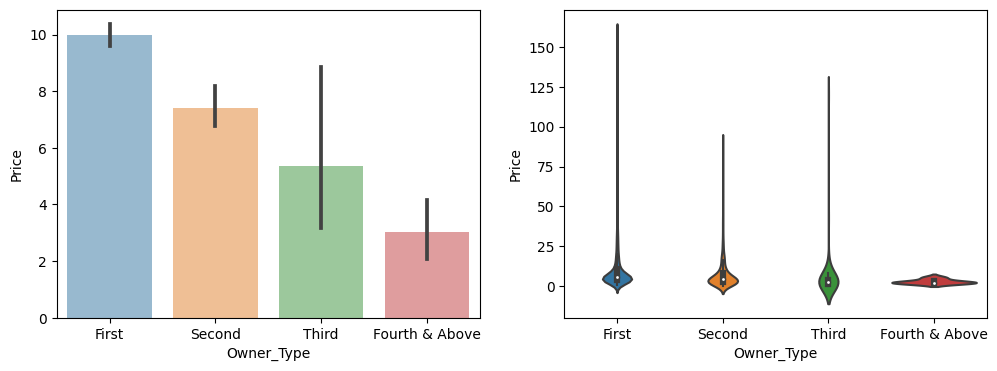

In [20]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.barplot(x=X_train['Owner_Type'], y=y_train, order=owner_counts.index, alpha=0.5)
plt.subplot(1, 2, 2)
sns.violinplot(x=X_train['Owner_Type'], y=y_train, order=owner_counts.index, alpha=0.5)

There are only a few cars with at least four owners, so I'll join the 'Third' and 'Fourth & Above' categories into one. Also, since the more owners there are, the lower the price, I'll change the Owner_Type column into a numeric one.

In [21]:
owners = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 3}
X_train['Owners_No'] = X_train['Owner_Type'].map(owners)
X_train.drop('Owner_Type', axis=1, inplace=True)
X_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Brand,Brand_Model,Owners_No
4201,Jaipur,2011,77000,Diesel,Manual,22.07 kmpl,1199 CC,73.9 bhp,5.0,Volkswagen,Volkswagen Polo,1
4383,Hyderabad,2016,19947,Petrol,Manual,20.36 kmpl,1197 CC,78.9 bhp,5.0,Hyundai,Hyundai i10,1
1779,Kochi,2014,70963,Diesel,Manual,15.1 kmpl,2179 CC,140 bhp,7.0,Mahindra,Mahindra XUV500,1
4020,Kolkata,2013,115195,Diesel,Manual,25.2 kmpl,1248 CC,74 bhp,5.0,Maruti,Maruti Swift,1
3248,Kochi,2011,58752,Petrol,Manual,16.47 kmpl,1198 CC,73.9 bhp,5.0,Volkswagen,Volkswagen Polo,1


### Location

In [22]:
X_train.value_counts('Location')

Location
Mumbai        544
Hyderabad     519
Kochi         459
Coimbatore    446
Pune          440
Delhi         392
Kolkata       376
Chennai       338
Jaipur        283
Bangalore     263
Ahmedabad     153
dtype: int64

<AxesSubplot: xlabel='Location', ylabel='Price'>

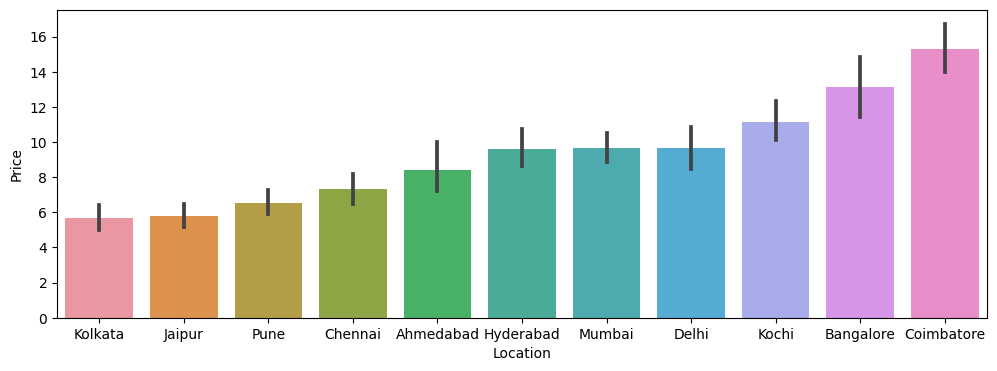

In [23]:
train_set = X_train.copy()
train_set['Price'] = y_train
sorted_locations = train_set[['Price', 'Location']].groupby('Location').mean().sort_values(by='Price')
sorted_locations_index = sorted_locations.index
fig = plt.figure(figsize=(12,4))
sns.barplot(data=train_set, x='Location', y='Price', order=sorted_locations_index)

All locations will be used in the models since there is a lot of data for each location.

In [24]:
X_train = pd.get_dummies(X_train, columns=['Location'])

<AxesSubplot: >

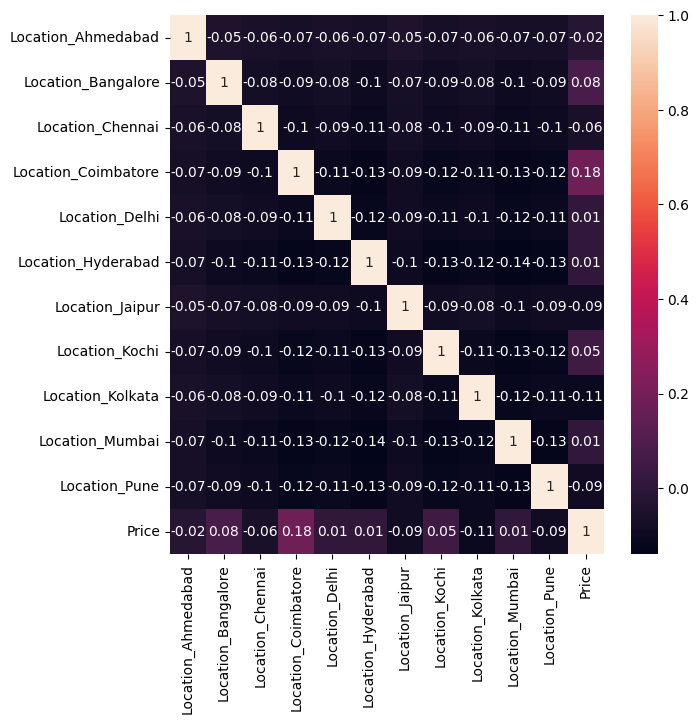

In [25]:
location_columns = [col for col in X_train.columns if col.startswith('Location_')]
train_set = X_train.copy()
train_set['Price'] = y_train
plt.figure(figsize=(7, 7))
sns.heatmap(train_set[location_columns + ['Price']].corr().round(2), annot=True)

Some locations, like Coimbatore, have a positive correlation with the price. Others, like Kolkata, have a negative correlation with the price. That being said, correlations aren't high.

### Fuel_Type

In [26]:
X_train['Fuel_Type'].value_counts()

Diesel      2236
Petrol      1929
CNG           39
LPG            8
Electric       1
Name: Fuel_Type, dtype: int64

Only Diesel, Petrol and CNG appear in data often enough to consider them as important categories while making transformations.

In [27]:
X_train.loc[df['Fuel_Type'].isin(['LPG', 'Electric']), ['Fuel_Type']] = None

<AxesSubplot: xlabel='Fuel_Type', ylabel='Price'>

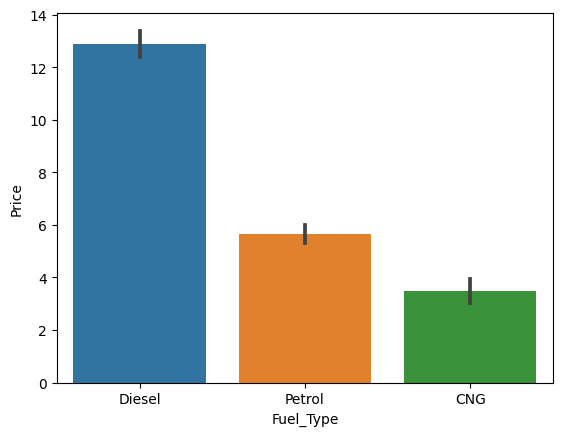

In [28]:
sns.barplot(x=X_train['Fuel_Type'], y=y_train)

In [29]:
X_train = pd.get_dummies(X_train, columns=['Fuel_Type'])

<AxesSubplot: >

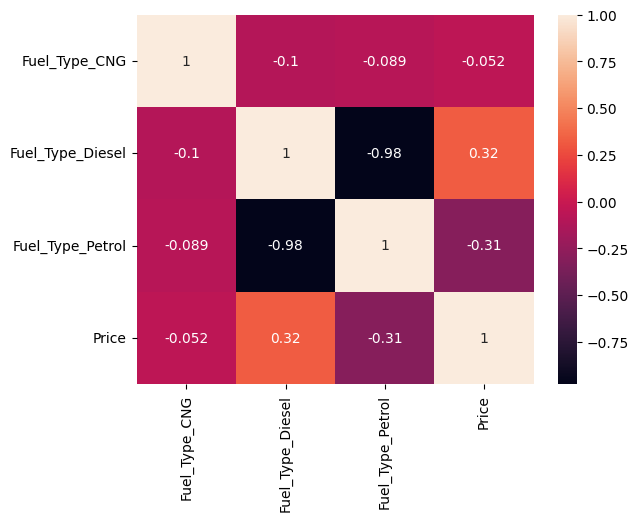

In [30]:
fuels_price_set = X_train.loc[:, ['Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]
fuels_price_set['Price'] = y_train
sns.heatmap(fuels_price_set.corr(), annot=True)

Diesel has a significant positive impact on the price, petrol has a significant negative impact on the price, while CNG doesn't have much impact on the price.

### Transmission

In [31]:
X_train['Transmission'].value_counts()

Manual       3012
Automatic    1201
Name: Transmission, dtype: int64

<AxesSubplot: xlabel='Transmission', ylabel='Price'>

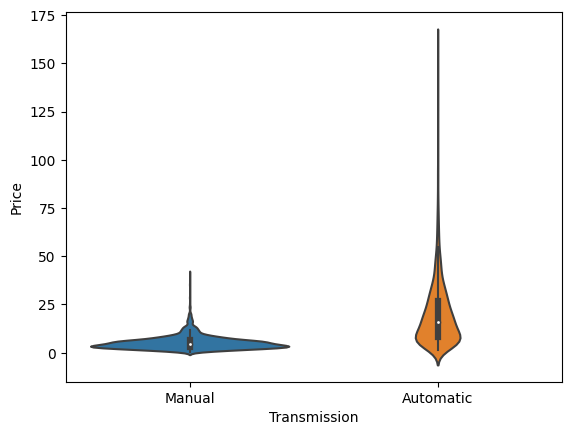

In [32]:
sns.violinplot(x=X_train['Transmission'], y=y_train)

The prices are generally higher for automatic cars. Since there are only two possible values for the Transmission column, and both of them appear often, both of these values will be considered important when transforming the column.

### Mileage & Engine & Power & Seats

In [33]:
X_train['Mileage'].apply(lambda x: str(x).split()[1] if len(str(x).split()) > 1 else None).value_counts()

kmpl     4165
km/kg      47
Name: Mileage, dtype: int64

There are two different units used in the Mileage column but they are equivalent. It's best to remove units and make the column numeric.

In [34]:
X_train['Mileage'] = X_train['Mileage'].apply(lambda x: float(str(x).split()[0]))

In [35]:
X_train['Mileage'].describe()

count    4212.000000
mean       18.150556
std         4.575075
min         0.000000
25%        15.100000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [36]:
X_train.loc[X_train['Mileage'] == 0, ['Mileage']] = None

In [37]:
sum(X_train['Mileage'].isna())

44

Since mileage cannot equal zero, I replaced zeros with Nans

In [38]:
X_train['Mileage'].describe()

count    4169.000000
mean       18.337764
std         4.208733
min         6.400000
25%        15.290000
50%        18.330000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [39]:
X_train['Engine'].apply(lambda x: str(x).split()[1] if len(str(x).split()) > 1 else None).value_counts()

CC    4189
Name: Engine, dtype: int64

In [40]:
X_train['Engine'] = X_train['Engine'].apply(lambda x: float(str(x).split()[0]))

In [41]:
X_train['Engine'].describe()

count    4189.000000
mean     1622.550967
std       604.740206
min        72.000000
25%      1197.000000
50%      1493.000000
75%      1984.000000
max      5461.000000
Name: Engine, dtype: float64

In [42]:
sum(X_train['Engine'].isna())

24

For engine, all data are in the same unit, there are no unreliable data, so I changed the column to a numeric one.

In [43]:
X_train['Power'].apply(lambda x: str(x).split()[1] if len(str(x).split()) > 1 else None).value_counts()

bhp    4189
Name: Power, dtype: int64

In [44]:
X_train['Power'] = X_train['Power'].apply(lambda x: float(str(x).split()[0]) if str(x).split()[0] != 'null' else None)

In [45]:
sum(X_train['Power'].isna())

92

In [46]:
X_train['Power'].describe()

count    4121.000000
mean      112.998726
std        53.666942
min        34.200000
25%        76.800000
50%        94.000000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

In [47]:
sum(X_train['Seats'].isna())

28

In [48]:
features_price_set = X_train.copy()
features_price_set['Price'] = y_train
absolute_correlation_values = np.abs(features_price_set.corr(numeric_only=True)['Price']).nlargest(11)
absolute_correlation_values

Price                  1.000000
Power                  0.774640
Engine                 0.655978
Mileage                0.334356
Fuel_Type_Diesel       0.323962
Fuel_Type_Petrol       0.312333
Year                   0.302470
Location_Coimbatore    0.179550
Kilometers_Driven      0.163571
Location_Kolkata       0.106384
Owners_No              0.099605
Name: Price, dtype: float64

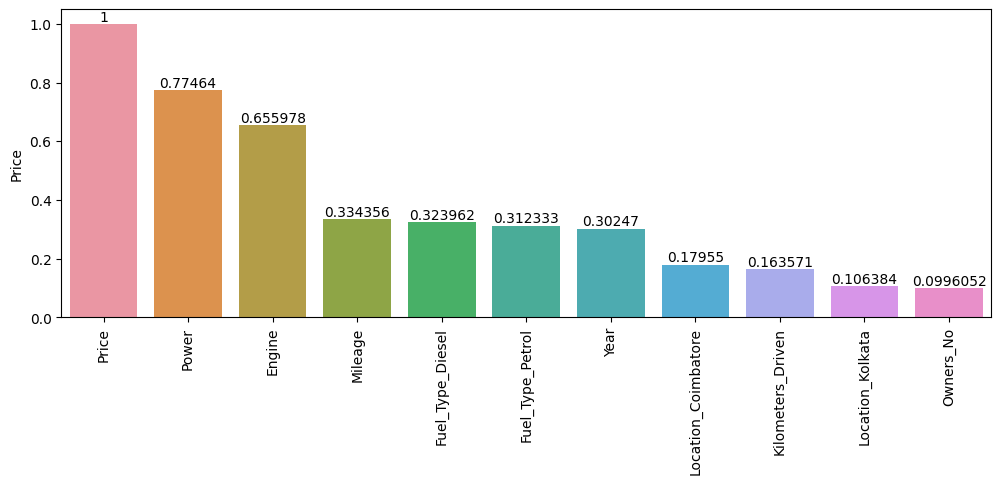

In [49]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x=absolute_correlation_values.index, y=absolute_correlation_values)
plt.xticks(rotation='vertical');
ax.bar_label(ax.containers[0]);

Power and engine have the highest correlation with the price (over 0.65). Mileage, fuel types and year also have a significant impact on the price. Seats is not even in the top 10 of absolute correlation values, thus it doesn't have much impact on the price.

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4213 non-null   int64  
 1   Kilometers_Driven    4213 non-null   int64  
 2   Transmission         4213 non-null   object 
 3   Mileage              4169 non-null   float64
 4   Engine               4189 non-null   float64
 5   Power                4121 non-null   float64
 6   Seats                4185 non-null   float64
 7   Brand                4108 non-null   object 
 8   Brand_Model          3793 non-null   object 
 9   Owners_No            4213 non-null   int64  
 10  Location_Ahmedabad   4213 non-null   uint8  
 11  Location_Bangalore   4213 non-null   uint8  
 12  Location_Chennai     4213 non-null   uint8  
 13  Location_Coimbatore  4213 non-null   uint8  
 14  Location_Delhi       4213 non-null   uint8  
 15  Location_Hyderabad   4213 non-null  

For the sake of further analysis, I'll remove the rows with Nans in Mileage, Engine, Power and Seats columns. In the actual models, it'll be best to make predictions after removing Nans and after replacing Nans separately, and compare which approach is better.

In [51]:
X_train.dropna(axis=0, subset=['Power', 'Engine', 'Mileage', 'Seats'], inplace=True)

### Correlations

In order to find all features' correlations with the price, I'll get dummies on all the columns on which I haven't done it so far.

In [52]:
X_train = pd.get_dummies(X_train)

In [53]:
train_set = X_train.copy()
train_set['Price'] = y_train
abs_correlations = np.abs(train_set.corr()['Price']).sort_values(ascending=False)
abs_correlations[abs_correlations > 0.1]

Price                                1.000000
Power                                0.776057
Engine                               0.655062
Transmission_Manual                  0.577164
Transmission_Automatic               0.577164
Mileage                              0.337870
Brand_Mercedes-Benz                  0.334506
Fuel_Type_Diesel                     0.321866
Fuel_Type_Petrol                     0.310041
Brand_Audi                           0.306211
Brand_BMW                            0.297992
Year                                 0.297610
Brand_Model_Land Rover               0.279300
Brand_Land                           0.279300
Brand_Model_Audi Q7                  0.234216
Brand_Maruti                         0.218852
Brand_Jaguar                         0.210346
Location_Coimbatore                  0.179546
Brand_Hyundai                        0.172127
Kilometers_Driven                    0.159048
Brand_Model_BMW 5                    0.154646
Brand_Model_Audi Q5               

The greatest impact on the price seem to have: Power, Engine, Transimission, Mileage, a few brands (specially Mercedes-Benz), the fuel type, a year, and the number of kilometers driven. Locations Coimbatore and Kolkata also seem to have a meaniningful correlation wth the price. Also, a few car models seem to have an impact on the price.

<AxesSubplot: >

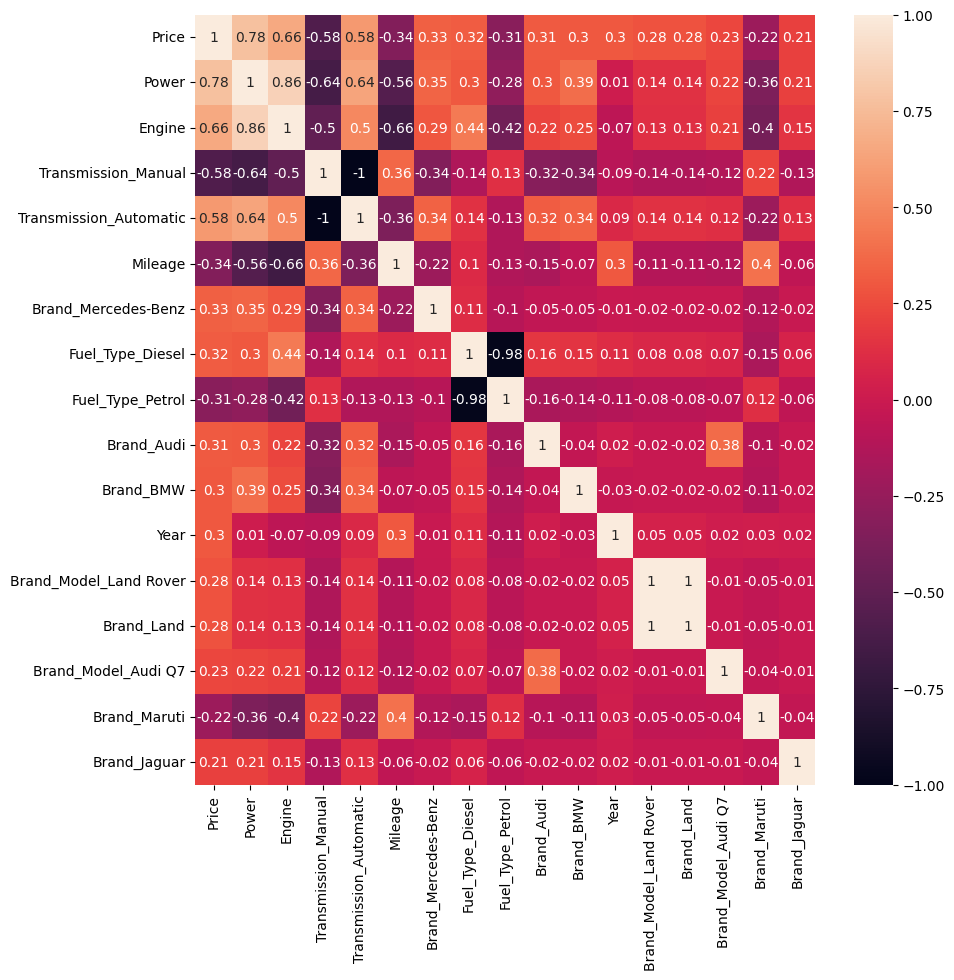

In [54]:
important_correlations_index = abs_correlations[abs_correlations > 0.2].index
plt.figure(figsize=(10, 10))
sns.heatmap(train_set[important_correlations_index].corr().round(2), annot=True) # features with absoulte correlation > 0.2

In [55]:
correlations = train_set.corr()['Price']
correlations[correlations < -0.1].sort_values(ascending=True)

Transmission_Manual        -0.577164
Mileage                    -0.337870
Fuel_Type_Petrol           -0.310041
Brand_Maruti               -0.218852
Brand_Hyundai              -0.172127
Kilometers_Driven          -0.159048
Brand_Honda                -0.123081
Location_Kolkata           -0.107450
Brand_Model_Maruti Swift   -0.100660
Brand_Model_Maruti Wagon   -0.100466
Name: Price, dtype: float64

The negative impact on the price have: the manual transmission, the mileage (the greater the mileage, the lower the price), the petrol fuel type, brands Maruti, Hyundai and Honda, the number of kilometers driven, and the location in Kolkata.

<AxesSubplot: >

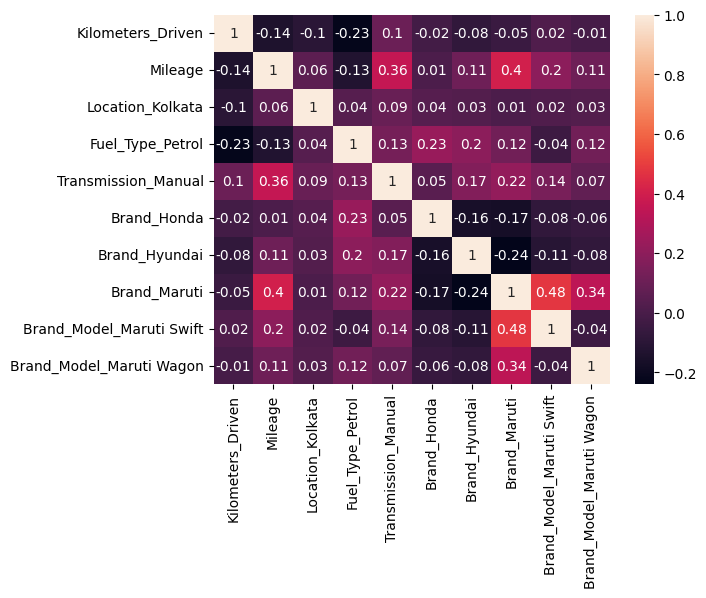

In [60]:
important_neg_correlations_index = correlations[correlations < -0.1].index
sns.heatmap(train_set[important_neg_correlations_index].corr().round(2), annot=True) # features with absoulte correlation > 0.2

### Outliers

In [57]:
print('Candidates for outliers:')
for column in X_train.columns:
    if len(X_train[column].unique()) > 2:
        q25, q75 = np.percentile(X_train[column], 25), np.percentile(X_train[column], 75)
        iqr = q75 - q25
        lower_bound = q25 - 1.5 * iqr
        upper_bound = q75 + 1.5 * iqr
        outliers_sum = sum((X_train[column] > upper_bound) | (X_train[column] < lower_bound))
        if outliers_sum > 0 and lower_bound != upper_bound:
            print(f'{column}: {outliers_sum} possible outliers')
            print(f'lower bound: {round(lower_bound, 2)}, upper_bound: {round(upper_bound, 2)}')
            print('max:', X_train[column].max())
            print('min:', X_train[column].min())

Candidates for outliers:
Year: 69 possible outliers
lower bound: 2006.0, upper_bound: 2022.0
max: 2019
min: 1998
Kilometers_Driven: 148 possible outliers
lower bound: -24390.62, upper_bound: 129834.38
max: 775000
min: 600
Mileage: 13 possible outliers
lower bound: 6.57, upper_bound: 29.82
max: 33.54
min: 6.4
Engine: 42 possible outliers
lower bound: 16.5, upper_bound: 3164.5
max: 5461.0
min: 624.0
Power: 159 possible outliers
lower bound: -15.65, upper_bound: 230.35
max: 560.0
min: 34.2


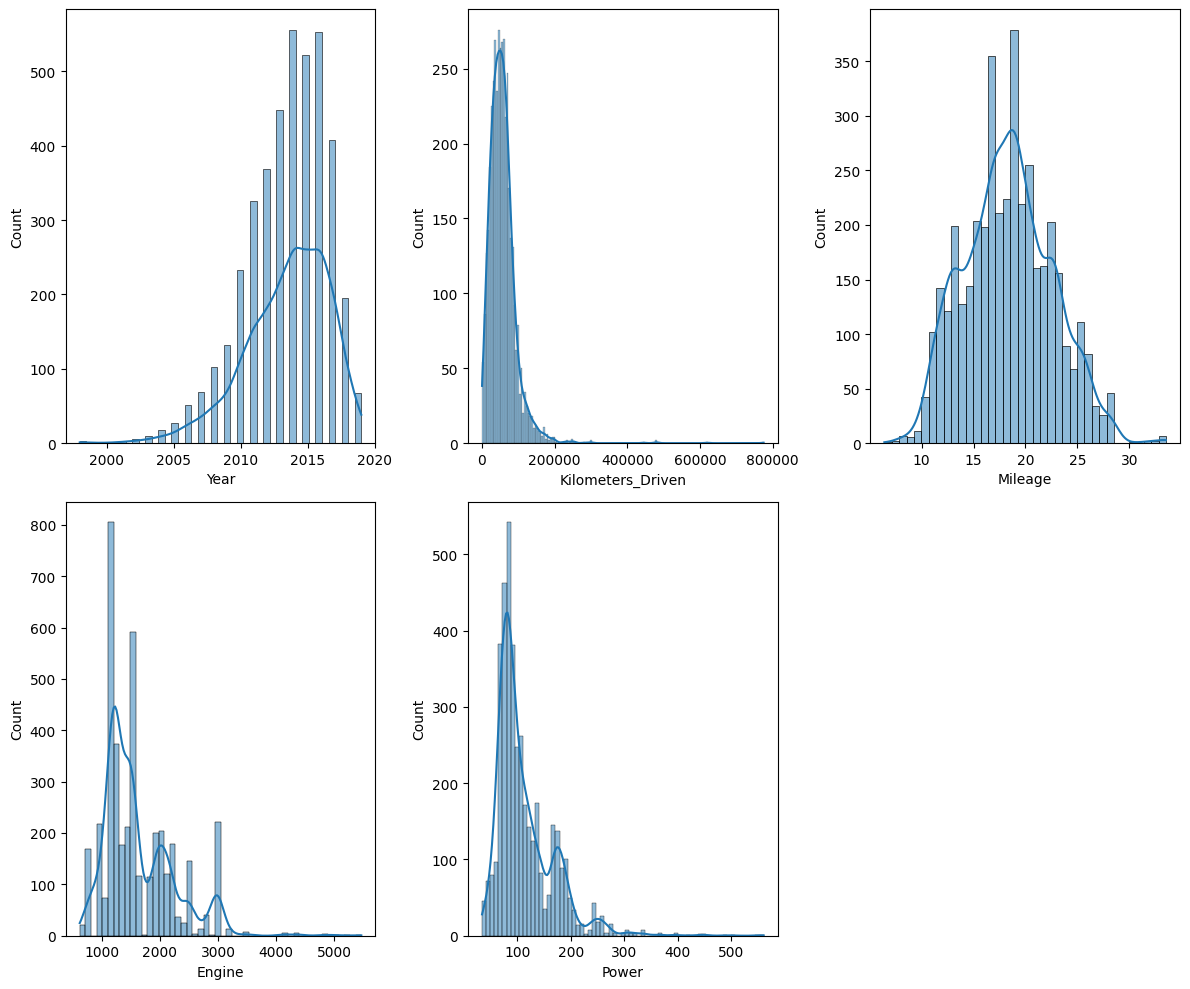

In [66]:
fig = plt.figure(figsize=(12,10))
plt.subplot(2, 3, 1)
sns.histplot(X_train['Year'], kde=True)
plt.subplot(2, 3, 2)
sns.histplot(X_train['Kilometers_Driven'], kde=True)
plt.subplot(2, 3, 3)
sns.histplot(X_train['Mileage'], kde=True)
plt.subplot(2, 3, 4)
sns.histplot(X_train['Engine'], kde=True)
plt.subplot(2, 3, 5)
sns.histplot(X_train['Power'], kde=True)
fig.tight_layout()

These all seem to be natural outliers and thus I don't have to remove/replace them. However, while fitting the models, it may be a good idea to check the models performances when the outliers are replaced.